# Monitor optimisations

This notebook will show how to check the status of the optimisations while they are running.

It is important to do so as optimisation often do not behave as expected or crash. Noticing that early on alllows to stop the optimisations early and avoid losing time and compute resources.

In [11]:
import pickle
import glob
import numpy
import json
import matplotlib.pyplot as plt

Here inform the githash (iteration_tag) of the run your are interested in:

In [12]:
githash = None

The following cell will read all the optimisation checkpoints matching the githash and display the current state of the optimisation:

./checkpoints/emodel=L5PC__seed=1.pkl
Best fitness: 2.491694817290348 from checkpoint ./checkpoints/emodel=L5PC__seed=1.pkl


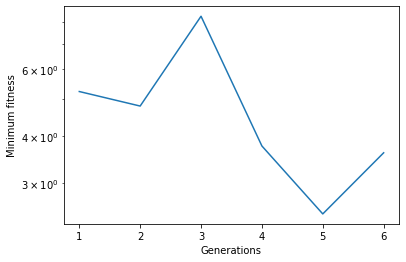

In [13]:
best_fitness = []

if githash is None:
    paths = glob.glob(f"./checkpoints/**/*.pkl", recursive=True)
else:
    paths = glob.glob(f"./checkpoints/**/*{githash}*.pkl", recursive=True)

for path in paths:
    print(path)
    data = pickle.load(open(path, "rb"))
    plt.plot(data["logbook"].select("gen"), data["logbook"].select("min"))
    best_fitness.append(sum(data["halloffame"][0].fitness.values))

if best_fitness:
    print(f"Best fitness: {min(best_fitness)} from checkpoint {paths[numpy.argmin(best_fitness)]}")

plt.xlabel("Generations")
plt.ylabel("Minimum fitness")
plt.yscale("log")
plt.show()